In [1]:
import sys
import pymysql
import pandas as pd
from pandas import Series, DataFrame
from PyQt5.QtWidgets import *

In [2]:
column_idx_lookup = {'seq': 0, 'node': 1, 'temp': 2, 'humi' : 3, 'date' : 4, 'time':5}

In [3]:
class MyWindow(QMainWindow):
    def __init__(self):
        super().__init__()
        self.setupUI()

    def setupUI(self):
        self.setGeometry(800, 200, 500, 500)
        self.setWindowTitle("DB Read Table")

        self.tableWidget = QTableWidget(self)
        self.tableWidget.resize(500, 500)
        self.tableWidget.setRowCount(200) # seq, node , temp, humi, date, time
        self.tableWidget.setColumnCount(6)
        self.tableWidget.setEditTriggers(QAbstractItemView.NoEditTriggers)
        
        self.setTableWidgetData()

    def setTableWidgetData(self):
        column_headers = ['seq', 'node', 'temp', 'humi', 'date', 'temp']
        self.tableWidget.setHorizontalHeaderLabels(column_headers)
        conn = pymysql.connect(host= 'localhost', user='root', password='1234', db='usn', charset='utf8')
        curs = conn.cursor(pymysql.cursors.DictCursor)
        curs.execute("""select * from usnnode""")
        rows = curs.fetchall()
        seq_list = []
        node_list = []
        temp_list = []
        humi_list = []
        date_list = []
        time_list = []
        db_dict = {}
        length = len(rows)
        for i in range(length):
            seq = rows[i]['seq']
            node = rows[i]['node']
            temp = rows[i]['temp']
            humi = rows[i]['humi']
            db_date = rows[i]['date']
            db_time = rows[i]['time']
            seq_list.append(seq)
            node_list.append(node)
            temp_list.append(temp)
            humi_list.append(humi)
            date_list.append(db_date)
            time_list.append(db_time)

        db_dict['seq'] = seq_list
        db_dict['node'] = node_list
        db_dict['temp'] = temp_list
        db_dict['humi'] = humi_list
        db_dict['date'] = date_list
        db_dict['time'] = time_list
        for k, v in db_dict.items():
            col = column_idx_lookup[k]
            for row, val in enumerate(v):
                item = QTableWidgetItem(val)
                self.tableWidget.setItem(row, col, item)
                
        self.tableWidget.resizeColumnsToContents()
        self.tableWidget.resizeRowsToContents()

In [4]:
if __name__ == "__main__":
    app = QApplication(sys.argv)
    mywindow = MyWindow()
    mywindow.show()
    app.exec_()

In [5]:
conn = pymysql.connect(host='localhost', user='root', password='1234', db='usn', charset='utf8')
curs = conn.cursor(pymysql.cursors.DictCursor)
curs.execute("""select * from usnnode""")
rows = curs.fetchall()

In [6]:
len(rows)
print(rows[0]['temp'])

10.08


In [7]:
rows[0]

{'date': '2017-12-07',
 'humi': '15.16',
 'node': '3',
 'seq': 1,
 'temp': '10.08',
 'time': '11:56:23'}

In [8]:
seq_list = []
node_list = []
temp_list = []
humi_list = []
date_list = []
time_list = []
db_dict = {}
length = len(rows)
for i in range(length):
    seq = rows[i]['seq']
    node = rows[i]['node']
    temp = rows[i]['temp']
    humi = rows[i]['humi']
    db_date = rows[i]['date']
    db_time = rows[i]['time']
    seq_list.append(seq)
    node_list.append(node)
    temp_list.append(temp)
    humi_list.append(humi)
    date_list.append(db_date)
    time_list.append(db_time)
    
db_dict['seq'] = seq_list
db_dict['node'] = node_list
db_dict['temp'] = temp_list
db_dict['humi'] = humi_list
db_dict['date'] = date_list
db_dict['time'] = time_list

print(db_dict)

{'temp': ['10.08', '10.22', '10.48', '10.92', '10.61', '10.74', '10.47', '10.26', '10.84', '10.36', '10.14', '10.9', '10.61', '10.64', '10.37', '10.43', '10.16', '10.49', '10.33', '10.08', '10.23', '10.19', '11.0', '10.14', '10.14', '10.86', '10.72', '10.09', '10.21', '10.91', '10.43', '10.32', '10.85', '10.31', '10.73', '10.91', '10.57', '10.09', '10.95', '10.31', '10.89', '10.01', '10.76', '10.8', '10.32', '10.44', '10.33', '10.64', '10.78', '10.48', '10.58', '10.38', '10.28', '10.89', '10.05', '10.8', '10.85', '10.8', '10.12', '10.82', '10.96', '10.1', '10.73', '10.36', '10.03', '10.17', '10.38', '10.27', '10.34', '10.84', '10.99', '10.12', '10.93', '10.75', '10.38', '10.13', '10.75', '10.11', '10.01', '10.33', '10.1', '10.59', '10.19', '10.75', '10.54', '10.01', '10.63', '10.14', '10.77', '10.65', '10.52', '10.27', '10.91', '10.94', '10.8', '10.42', '10.4', '10.67', '10.59', '10.58', '10.62', '10.08', '10.13', '10.06', '10.39', '10.68', '10.83', '10.7', '10.16', '10.53', '10.96', '

In [9]:
temp_list = []
print(temp_list)

[]


In [10]:
column_idx_lookup = {'seq': 0, 'node': 1, 'temp': 2, 'humi' : 3, 'date' : 4, 'time':5}

In [11]:
for k, v in db_dict.items():
    col = column_idx_lookup[k]
    for row, val in enumerate(v): 
        # 이 함수는 순서가 있는 자료형
        #(리스트, 튜플, 문자열)을 입력으로 받아 인덱스 값을 포함하는 enumerate 객체를 리턴한다.
        print(val)
        print('row', row, 'col', col)

10.08
row 0 col 2
10.22
row 1 col 2
10.48
row 2 col 2
10.92
row 3 col 2
10.61
row 4 col 2
10.74
row 5 col 2
10.47
row 6 col 2
10.26
row 7 col 2
10.84
row 8 col 2
10.36
row 9 col 2
10.14
row 10 col 2
10.9
row 11 col 2
10.61
row 12 col 2
10.64
row 13 col 2
10.37
row 14 col 2
10.43
row 15 col 2
10.16
row 16 col 2
10.49
row 17 col 2
10.33
row 18 col 2
10.08
row 19 col 2
10.23
row 20 col 2
10.19
row 21 col 2
11.0
row 22 col 2
10.14
row 23 col 2
10.14
row 24 col 2
10.86
row 25 col 2
10.72
row 26 col 2
10.09
row 27 col 2
10.21
row 28 col 2
10.91
row 29 col 2
10.43
row 30 col 2
10.32
row 31 col 2
10.85
row 32 col 2
10.31
row 33 col 2
10.73
row 34 col 2
10.91
row 35 col 2
10.57
row 36 col 2
10.09
row 37 col 2
10.95
row 38 col 2
10.31
row 39 col 2
10.89
row 40 col 2
10.01
row 41 col 2
10.76
row 42 col 2
10.8
row 43 col 2
10.32
row 44 col 2
10.44
row 45 col 2
10.33
row 46 col 2
10.64
row 47 col 2
10.78
row 48 col 2
10.48
row 49 col 2
10.58
row 50 col 2
10.38
row 51 col 2
10.28
row 52 col 2
10.89


row 182 col 3
15.87
row 183 col 3
15.45
row 184 col 3
15.22
row 185 col 3
15.68
row 186 col 3
15.78
row 187 col 3
15.8
row 188 col 3
15.16
row 189 col 3
15.74
row 190 col 3
15.53
row 191 col 3
15.27
row 192 col 3
15.7
row 193 col 3
15.12
row 194 col 3
15.62
row 195 col 3
15.12
row 196 col 3
15.36
row 197 col 3
15.97
row 198 col 3
15.85
row 199 col 3
1
row 0 col 0
2
row 1 col 0
3
row 2 col 0
4
row 3 col 0
5
row 4 col 0
6
row 5 col 0
7
row 6 col 0
8
row 7 col 0
9
row 8 col 0
10
row 9 col 0
11
row 10 col 0
12
row 11 col 0
13
row 12 col 0
14
row 13 col 0
15
row 14 col 0
16
row 15 col 0
17
row 16 col 0
18
row 17 col 0
19
row 18 col 0
20
row 19 col 0
21
row 20 col 0
22
row 21 col 0
23
row 22 col 0
24
row 23 col 0
25
row 24 col 0
26
row 25 col 0
27
row 26 col 0
28
row 27 col 0
29
row 28 col 0
30
row 29 col 0
31
row 30 col 0
32
row 31 col 0
33
row 32 col 0
34
row 33 col 0
35
row 34 col 0
36
row 35 col 0
37
row 36 col 0
38
row 37 col 0
39
row 38 col 0
40
row 39 col 0
41
row 40 col 0
42
row 41 c

row 82 col 4
2017-12-07
row 83 col 4
2017-12-07
row 84 col 4
2017-12-07
row 85 col 4
2017-12-07
row 86 col 4
2017-12-07
row 87 col 4
2017-12-07
row 88 col 4
2017-12-07
row 89 col 4
2017-12-07
row 90 col 4
2017-12-07
row 91 col 4
2017-12-07
row 92 col 4
2017-12-07
row 93 col 4
2017-12-07
row 94 col 4
2017-12-07
row 95 col 4
2017-12-07
row 96 col 4
2017-12-07
row 97 col 4
2017-12-07
row 98 col 4
2017-12-07
row 99 col 4
2017-12-07
row 100 col 4
2017-12-07
row 101 col 4
2017-12-07
row 102 col 4
2017-12-07
row 103 col 4
2017-12-07
row 104 col 4
2017-12-07
row 105 col 4
2017-12-07
row 106 col 4
2017-12-07
row 107 col 4
2017-12-07
row 108 col 4
2017-12-07
row 109 col 4
2017-12-07
row 110 col 4
2017-12-07
row 111 col 4
2017-12-07
row 112 col 4
2017-12-07
row 113 col 4
2017-12-07
row 114 col 4
2017-12-07
row 115 col 4
2017-12-07
row 116 col 4
2017-12-07
row 117 col 4
2017-12-07
row 118 col 4
2017-12-07
row 119 col 4
2017-12-07
row 120 col 4
2017-12-07
row 121 col 4
2017-12-07
row 122 col 4
2017

In [12]:
for k, v in db_dict.items():
    col = column_idx_lookup[k]

In [13]:
column_idx_lookup['seq']

0

In [19]:
db_dict['temp']

['10.08',
 '10.22',
 '10.48',
 '10.92',
 '10.61',
 '10.74',
 '10.47',
 '10.26',
 '10.84',
 '10.36',
 '10.14',
 '10.9',
 '10.61',
 '10.64',
 '10.37',
 '10.43',
 '10.16',
 '10.49',
 '10.33',
 '10.08',
 '10.23',
 '10.19',
 '11.0',
 '10.14',
 '10.14',
 '10.86',
 '10.72',
 '10.09',
 '10.21',
 '10.91',
 '10.43',
 '10.32',
 '10.85',
 '10.31',
 '10.73',
 '10.91',
 '10.57',
 '10.09',
 '10.95',
 '10.31',
 '10.89',
 '10.01',
 '10.76',
 '10.8',
 '10.32',
 '10.44',
 '10.33',
 '10.64',
 '10.78',
 '10.48',
 '10.58',
 '10.38',
 '10.28',
 '10.89',
 '10.05',
 '10.8',
 '10.85',
 '10.8',
 '10.12',
 '10.82',
 '10.96',
 '10.1',
 '10.73',
 '10.36',
 '10.03',
 '10.17',
 '10.38',
 '10.27',
 '10.34',
 '10.84',
 '10.99',
 '10.12',
 '10.93',
 '10.75',
 '10.38',
 '10.13',
 '10.75',
 '10.11',
 '10.01',
 '10.33',
 '10.1',
 '10.59',
 '10.19',
 '10.75',
 '10.54',
 '10.01',
 '10.63',
 '10.14',
 '10.77',
 '10.65',
 '10.52',
 '10.27',
 '10.91',
 '10.94',
 '10.8',
 '10.42',
 '10.4',
 '10.67',
 '10.59',
 '10.58',
 '10.62',

In [21]:
for i, name in enumerate(db_dict['temp']):
    print(i, name)

0 10.08
1 10.22
2 10.48
3 10.92
4 10.61
5 10.74
6 10.47
7 10.26
8 10.84
9 10.36
10 10.14
11 10.9
12 10.61
13 10.64
14 10.37
15 10.43
16 10.16
17 10.49
18 10.33
19 10.08
20 10.23
21 10.19
22 11.0
23 10.14
24 10.14
25 10.86
26 10.72
27 10.09
28 10.21
29 10.91
30 10.43
31 10.32
32 10.85
33 10.31
34 10.73
35 10.91
36 10.57
37 10.09
38 10.95
39 10.31
40 10.89
41 10.01
42 10.76
43 10.8
44 10.32
45 10.44
46 10.33
47 10.64
48 10.78
49 10.48
50 10.58
51 10.38
52 10.28
53 10.89
54 10.05
55 10.8
56 10.85
57 10.8
58 10.12
59 10.82
60 10.96
61 10.1
62 10.73
63 10.36
64 10.03
65 10.17
66 10.38
67 10.27
68 10.34
69 10.84
70 10.99
71 10.12
72 10.93
73 10.75
74 10.38
75 10.13
76 10.75
77 10.11
78 10.01
79 10.33
80 10.1
81 10.59
82 10.19
83 10.75
84 10.54
85 10.01
86 10.63
87 10.14
88 10.77
89 10.65
90 10.52
91 10.27
92 10.91
93 10.94
94 10.8
95 10.42
96 10.4
97 10.67
98 10.59
99 10.58
100 10.62
101 10.08
102 10.13
103 10.06
104 10.39
105 10.68
106 10.83
107 10.7
108 10.16
109 10.53
110 10.96
111 10.76


In [23]:
import matplotlib.pyplot as plt

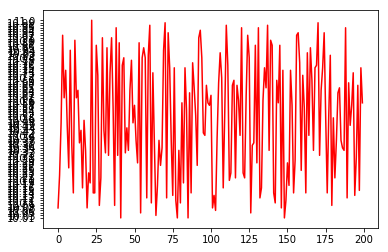

In [25]:
plt.plot(db_dict['temp'],'r')
plt.show()